In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('all')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datafirst/ASRS_combined_csv.csv")

In [ ]:
# delete the last column as it is completely NULL
df = df.iloc[:, :-1]

In [ ]:
df.head()

,,Time,Time.1,Place,Place.1,Place.2,Place.3,Place.4,Place.5,Place.6,...,Events.3,Events.4,Events.5,Assessments,Assessments.1,Report 1,Report 1.1,Report 2,Report 2.1,Report 1.2
0,ACN,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),...,Detector,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative,Callback,Synopsis
1,80169,198801,1201-1800,MEM,TN,NaN,NaN,0,NaN,NaN,...,Person Air Traffic Control,NaN,General None Reported / Taken,NaN,Airport,CLRD TO LAND ON RWY 27. AFTER LNDG WE MADE THE...,NaN,NaN,NaN,ACR LTT TAXIED ON CLOSED TAXIWAY.
2,80381,198801,1801-2400,JFK,NY,NaN,NaN,0,NaN,NaN,...,Person Flight Crew,NaN,Aircraft Aircraft Damaged; General None Report...,NaN,Airport,WX CONDITION CLR. ON APCH TO ILS 4R JFK FOLLOW...,NaN,NaN,NaN,FLT CREW FAILED TO RETRACT WING FLAPS TO THE F...
3,80496,198801,0601-1200,DFW,TX,NaN,NaN,0,NaN,NaN,...,Person Flight Crew,NaN,General None Reported / Taken,NaN,Human Factors,DURING PWRBACK FROM THE GATE AT DFW; POSSIBLE ...,NaN,NaN,NaN,ACR MLG POWERED BACK WITH ICE AND SNOW ON RAMP...
4,80675,198801,0601-1200,BIS,ND,NaN,NaN,0,NaN,NaN,...,Person Flight Crew,NaN,General None Reported / Taken,NaN,Weather,WHILE FLYING FO ON FLT LNDG BISMARCK VISUAL AP...,NaN,NaN,NaN,ACR MLG EXCURSION FROM ICY TXWY AFTER LNDG.


In [ ]:
# combining both the headers
first_headers = df.columns
second_headers = df.iloc[0]
new_headers = []

for i in range(len(first_headers)):
  new_headers.append(first_headers[i]+"_"+second_headers[i])

df.columns = new_headers

# excluding the second_headers
df = df.iloc[1: , :]

In [ ]:
df.head()

,_ACN,Time_Date,Time.1_Local Time Of Day,Place_Locale Reference,Place.1_State Reference,Place.2_Relative Position.Angle.Radial,Place.3_Relative Position.Distance.Nautical Miles,Place.4_Altitude.AGL.Single Value,Place.5_Altitude.MSL.Single Value,Place.6_Latitude / Longitude (UAS),...,Events.3_Detector,Events.4_When Detected,Events.5_Result,Assessments_Contributing Factors / Situations,Assessments.1_Primary Problem,Report 1_Narrative,Report 1.1_Callback,Report 2_Narrative,Report 2.1_Callback,Report 1.2_Synopsis
1,80169,198801,1201-1800,MEM,TN,NaN,NaN,0,NaN,NaN,...,Person Air Traffic Control,NaN,General None Reported / Taken,NaN,Airport,CLRD TO LAND ON RWY 27. AFTER LNDG WE MADE THE...,NaN,NaN,NaN,ACR LTT TAXIED ON CLOSED TAXIWAY.
2,80381,198801,1801-2400,JFK,NY,NaN,NaN,0,NaN,NaN,...,Person Flight Crew,NaN,Aircraft Aircraft Damaged; General None Report...,NaN,Airport,WX CONDITION CLR. ON APCH TO ILS 4R JFK FOLLOW...,NaN,NaN,NaN,FLT CREW FAILED TO RETRACT WING FLAPS TO THE F...
3,80496,198801,0601-1200,DFW,TX,NaN,NaN,0,NaN,NaN,...,Person Flight Crew,NaN,General None Reported / Taken,NaN,Human Factors,DURING PWRBACK FROM THE GATE AT DFW; POSSIBLE ...,NaN,NaN,NaN,ACR MLG POWERED BACK WITH ICE AND SNOW ON RAMP...
4,80675,198801,0601-1200,BIS,ND,NaN,NaN,0,NaN,NaN,...,Person Flight Crew,NaN,General None Reported / Taken,NaN,Weather,WHILE FLYING FO ON FLT LNDG BISMARCK VISUAL AP...,NaN,NaN,NaN,ACR MLG EXCURSION FROM ICY TXWY AFTER LNDG.
5,80748,198801,1801-2400,STL,MO,NaN,NaN,0,NaN,NaN,...,Person Air Traffic Control,NaN,General None Reported / Taken,Airport; Procedure,Human Factors,SMT X LANDED ON RWY 30R. AS HE SLOWED TO TAXI ...,NaN,NaN,NaN,CTLR HAD LESS THAN STANDARD SEPARATION BETWEEN...


In [ ]:
df.shape

(46771, 125)

In [ ]:
len(set(df.columns))

125

In [ ]:
df.describe()

,_ACN,Time_Date,Time.1_Local Time Of Day,Place_Locale Reference,Place.1_State Reference,Place.2_Relative Position.Angle.Radial,Place.3_Relative Position.Distance.Nautical Miles,Place.4_Altitude.AGL.Single Value,Place.5_Altitude.MSL.Single Value,Place.6_Latitude / Longitude (UAS),...,Events.3_Detector,Events.4_When Detected,Events.5_Result,Assessments_Contributing Factors / Situations,Assessments.1_Primary Problem,Report 1_Narrative,Report 1.1_Callback,Report 2_Narrative,Report 2.1_Callback,Report 1.2_Synopsis
count,46771,46771,44103,45745,45782,1885,9360,26772,14281,14,...,46003,32662,44476,42250,45812,46771,932,9410,101,46766
unique,46758,429,6,3456,71,302,180,149,490,1,...,235,307,5933,2897,19,46756,915,7687,88,46692
top,ACN,201910,1201-1800,ZZZ.Airport,US,270,0,0,3000,Latitude / Longitude (UAS),...,Person Flight Crew,In-flight,General None Reported / Taken,Aircraft,Human Factors,Narrative,Callback,[Report narrative contained no additional info...,Callback,Synopsis
freq,14,326,16423,15930,19403,124,5110,22792,1080,14,...,25816,23323,9169,6917,18897,14,14,1266,14,14


In [ ]:
# extracting years from the date-time
years = []

for i in df["Time_Date"]:
  years.append(i[:4])

df["Years"] = years

<Axes: title={'center': 'Years V/S Incidents'}>

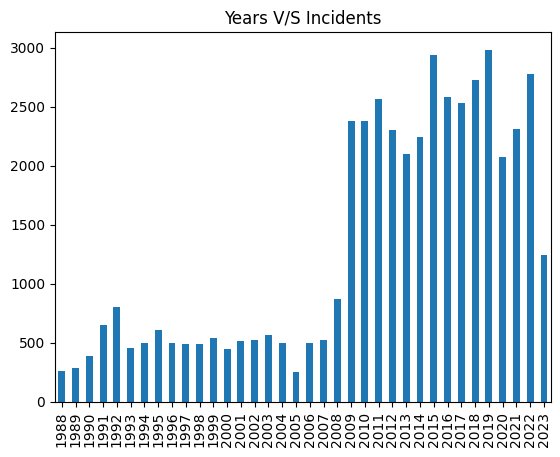

In [ ]:
years = df["Years"].value_counts()
years=years.drop(labels=["Date"])

years.sort_index().plot(kind='bar', title="Years V/S Incidents")

<Axes: title={'center': 'Time Quarters of the Day V/S Incidents'}>

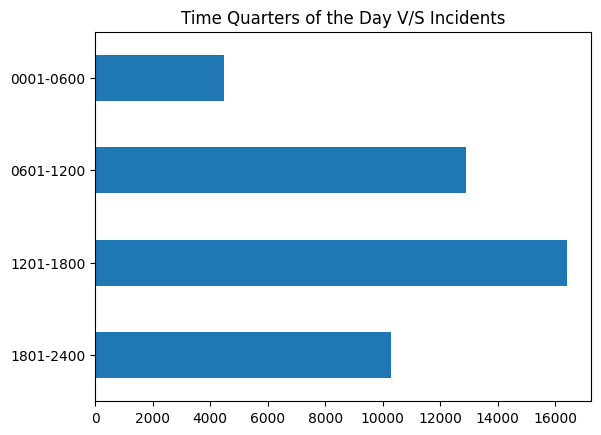

In [ ]:
quarters = df["Time.1_Local Time Of Day"].value_counts()
quarters=quarters.drop(labels=["Local Time Of Day", "ZZZ"])

quarters.sort_index(ascending=False).plot(kind='barh', title="Time Quarters of the Day V/S Incidents")

<Axes: title={'center': 'Flight Conditions V/S Incidents'}>

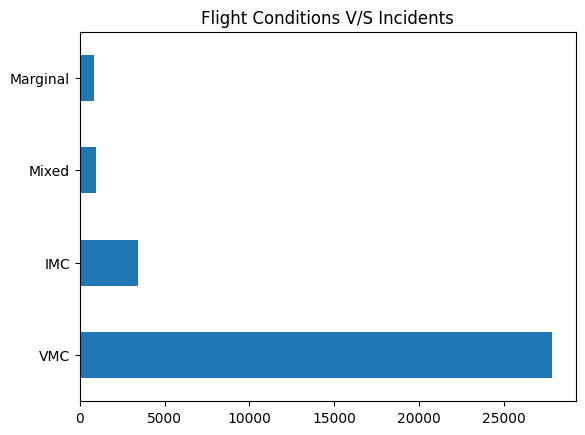

In [ ]:
col = df["Environment_Flight Conditions"].value_counts()
col = col.drop(labels=["Flight Conditions"])

col.plot(kind='barh', title="Flight Conditions V/S Incidents")

In [ ]:
col = df["Environment.1_Weather Elements / Visibility"]
col = col.dropna()

visibility = []
weather = []
exceptions = []
# allowed = ["cloudy", "clouds", "fog", "hail", "haze", "smoke", "icing", "rain", "snow", "thunderstorm", "turbulence", "windshear", "sun", "winds", "windy", "clear", "crosswinds", "gusty"]

for c in col:
  c = c.lower()
  if(str(c).isalpha()):
    weather.append(lemmatizer.lemmatize(c))
  elif(str(c).isnumeric()):
    visibility.append(float(c))
  else:
    vals = re.split(';|/', c)
    for v in vals:
      v = v.strip().lower()
      if(v.isalpha()):
        weather.append(lemmatizer.lemmatize(v))
      elif(v.isnumeric()):
        visibility.append(float(v))
      else:
        try:
            float(v)
            visibility.append(float(v))
        except ValueError:
            exceptions.append(v)

{'ifr', 'sun', 'skc', 'unlimited', 'fog', 'windy', 'clear', 'gusty', 'slush', 'thunderstorm', 'mist', 'visibility', 'cloud', 'dew', 'fzfg', 'overcast', 'lightening', 'visual', 'mvfr', 'calm', 'hot', 'scattered', 'gust', 's', 'vmc', 'microburst', 'other', 'icing', 'smog', 'cavu', 'sunset', 'strong', 'cloudy', 'sleet', 'few', 'cavok', 'smoke', 'wind', 'sandstorm', 'snow', 'lightning', 'dusk', 'humid', 'clr', 'heat', 'turbulence', 'none', 'rain', 'haze', 'crosswind', 'hail', 'highwinds', 'a', 'drizzle', 'windshear', 'vfr', 'humidity', 'dry', 'fzdz', 'hazy', 'broken'}
7450


<Axes: >

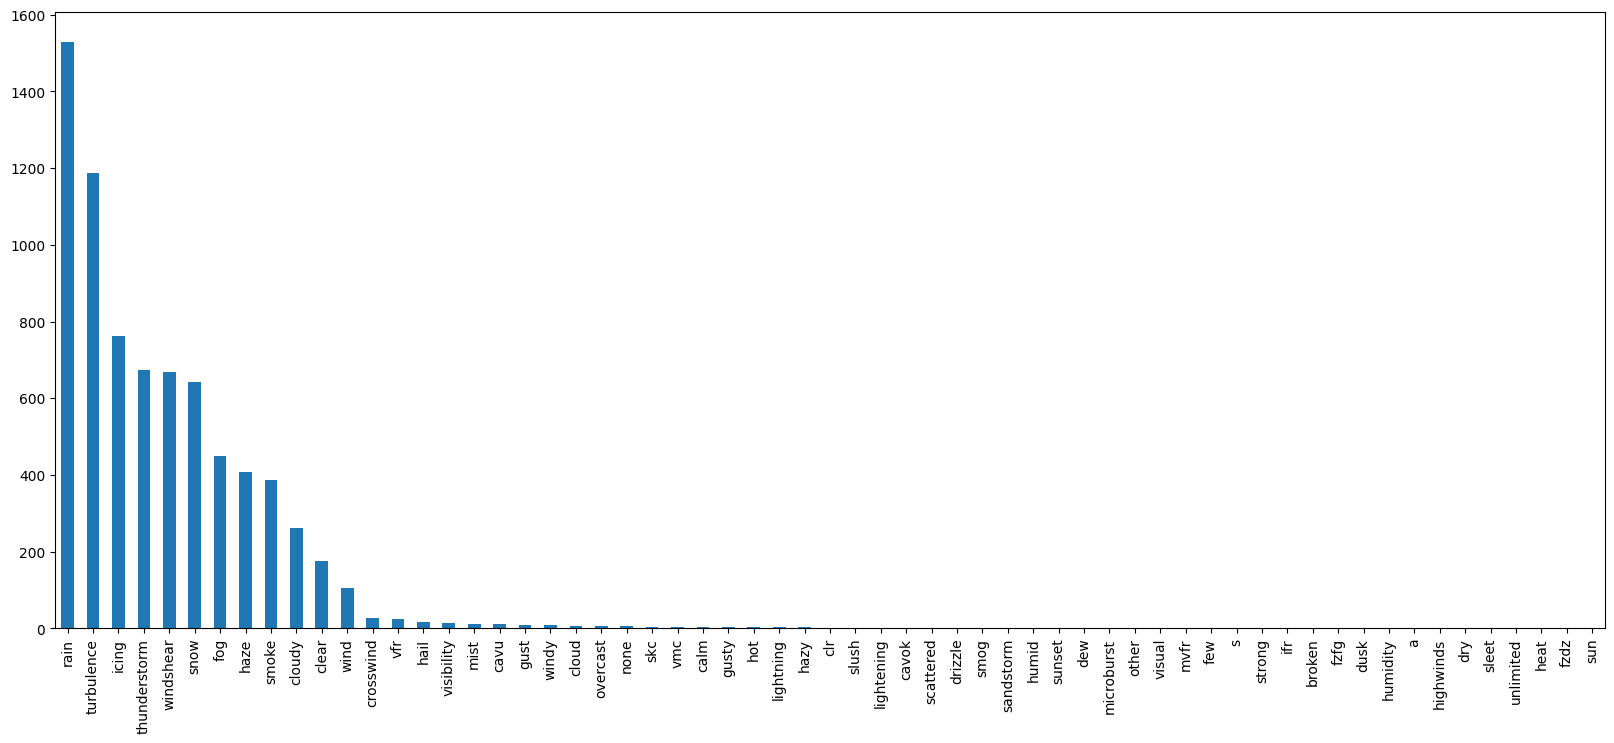

In [ ]:
print(set(weather))
print(len(weather))
weather = pd.Index(weather, name ='weather')
weather.value_counts().plot(kind="bar", figsize=(20,8))

12529


Text(0.5, 1.0, 'Visibility in Miles')

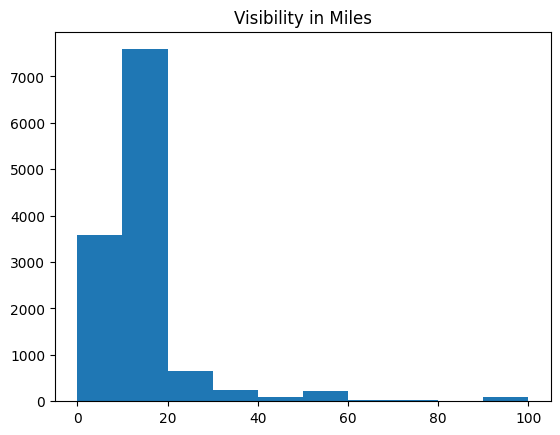

In [ ]:
print(len(visibility))
plt.hist(visibility, bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title("Visibility in Miles")

<Axes: >

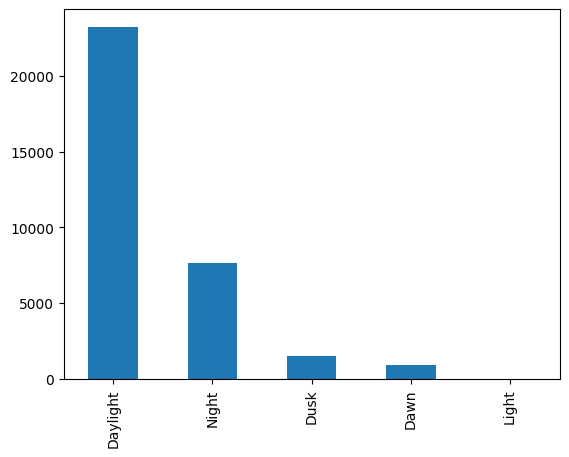

In [ ]:
df["Light"].value_counts().plot(kind='bar')

<Axes: >

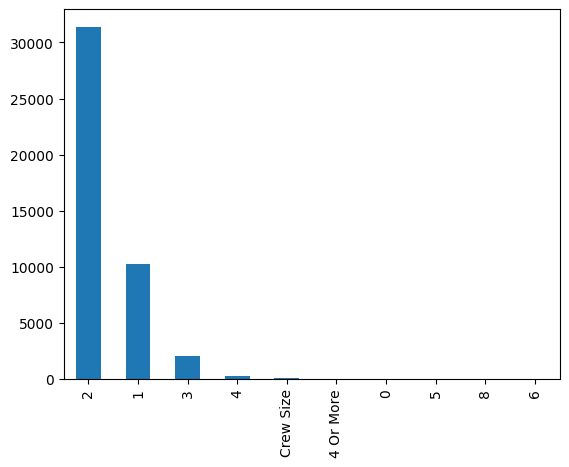

In [ ]:
df["Crew Size"].iloc[:,0].value_counts().plot(kind="bar")

['Air Carrier' nan 'Air Taxi' 'FBO' 'Government' 'Corporate' 'Personal'
 'Military' 'Other Other' 'Aircraft Operator' 'Personal; Air Taxi'
 'Other CAP' 'Other sales demo' 'Other Aerial Survey'
 'Other BANNER TOWING' 'Other all kinds' 'Other AIRSHOW'
 'Air Carrier; Personal' 'Other ALL TYPES' 'Other ARPT' 'Other cap'
 'Other AGRICULTURE' 'Other AIR AMBULANCE' 'Other Skydiving'
 'Other Manufacturer' 'FBO; Government' 'Other Fractional'
 'Other Agricultural' 'Other Photogracphy' 'Other Acft Repair' 'Other ZZZ'
 'Other Crop Dusting' 'Other 154' 'Other Tow' 'Other EMS' 'Other Pipeline'
 'Other Mapping' 'Fractional' 'Other Flight school' 'Other Flt School'
 'Other Part 61 Instruction' 'Other PRIVATE' 'Other Flight School'
 'Other vehicle' 'Other rental' 'Other CLUB' 'Other Flt.School'
 'Other flight school' 'Other Flt. school' 'Other School' 'Other Museum'
 'Other Agriculture' 'Other Civil Air Patrol' 'Other Pipeline Patrol'
 'Other Flight Training School' 'Other Flight Instruction'
 'Other 

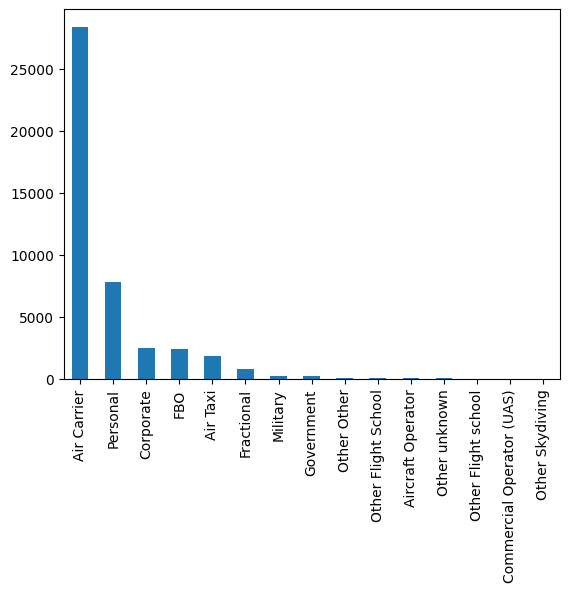

In [ ]:
df["Aircraft Operator"].iloc[:,0].value_counts()[:15].plot(kind="bar")
print(df["Aircraft Operator"].iloc[:,0].unique())

[nan 'Part 135' 'Part 121' 'Other Unknown' 'Part 91' 'Other Other'
 'Operating Under FAR Part' 'Part 119' 'Part 135; Part 91' 'Other all'
 'Part 125' 'Other 137' 'Other 105' 'Part 91; Other 201'
 'Part 91; Other 217' 'Other 141' 'Other 142' 'Other 61' 'Part 137'
 'Part 103' 'Part 129' 'Other Part 105' 'Other Part 141' 'Other 103'
 'Other 107' 'Other unknown' 'Part 107' 'Other Part 61'
 'Recreational Operations / Section 44809 (UAS)' 'Other 21'
 'Other Part 136']


<Axes: >

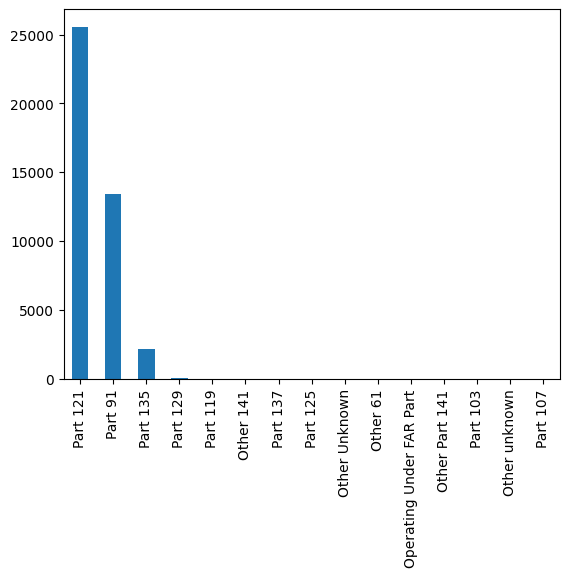

In [ ]:
print(df["Operating Under FAR Part"].iloc[:,0].unique())
df["Operating Under FAR Part"].iloc[:,0].value_counts()[:15].plot(kind="bar")

['VFR' 'IFR' 'None' nan 'DVFR' 'SVFR' 'SVFR; IFR' 'Flight Plan'
 'VFR; None' 'None; VFR' 'IFR; SVFR']


<Axes: >

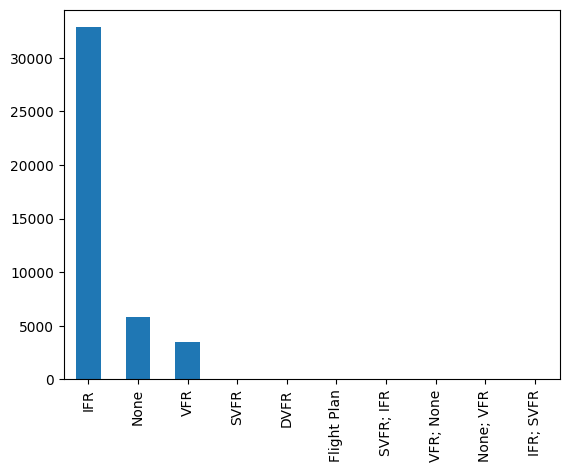

In [ ]:
print(df["Flight Plan"].iloc[:,0].unique())
df["Flight Plan"].iloc[:,0].value_counts()[:15].plot(kind="bar")

['Passenger' nan 'Cargo / Freight / Delivery' 'Training'
 'Test Flight / Demonstration' 'Other Utility' 'Ferry / Re-Positioning'
 'Personal' 'Other Other' 'Agriculture' 'Ambulance' 'Tactical' 'Refueling'
 'Training; Other Other' 'Mission' 'Other Repositioning'
 'Other Air Ambulance' 'Personal; Ambulance' 'Photo Shoot / Video'
 'Other N/S' 'Other demonstration flight' 'Other Aircraft Demonstration'
 'Other sales demo' 'Other SALES DEMO' 'Other Aerial Survey'
 'Other BFR / CHECK' 'Other FIRE SUPERVISOR' 'Banner Tow' 'Skydiving'
 'Other all' 'Other AIRSHOW' 'Other UNKNOWN'
 'Other ARPT MNTNC AND SUPPOSRT' 'Other Maint Test' 'Other UNK'
 'Other Glider Tow and Aerobatics.' 'Other NS' 'Other Cap'
 'Other TOW PLANE' 'Other Law Enforcement' 'Other Eng Start'
 'Aerobatics; Other 390' 'Other ENG MAINT' 'Other Military Charter'
 'Traffic Watch' 'Other Tour' 'Other Familiarization' 'Other Eng Run Up'
 'Aerobatics' 'Other Demo' 'Other Maint Taxi' 'Other Glider Tow'
 'Other Maintenance' 'Other EMS' 

<Axes: >

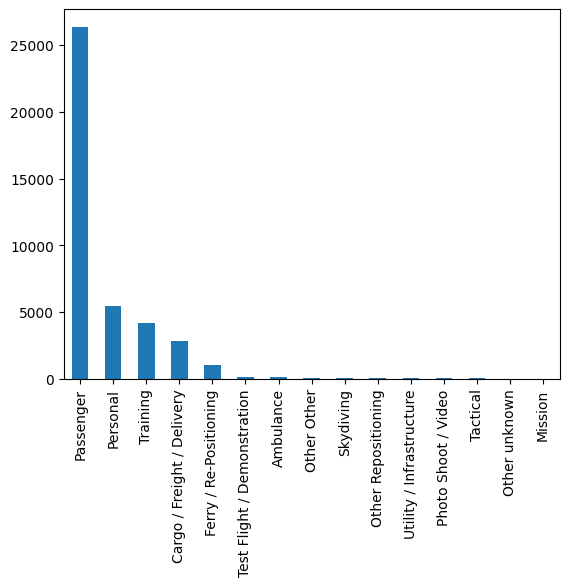

In [ ]:
print(df["Mission"].iloc[:,0].unique())
df["Mission"].iloc[:,0].value_counts()[:15].plot(kind="bar")

[nan 'Localizer/Glideslope/ILS IQO' 'Localizer/Glideslope/ILS CEF'
 'VOR / VORTAC ANC' 'Localizer/Glideslope/ILS MEM'
 'Localizer/Glideslope/ILS IFLQ' 'Localizer/Glideslope/ILS JFK'
 'Localizer/Glideslope/ILS TUPE' 'Nav In Use' 'VOR / VORTAC BOS.VORTAC'
 'VOR / VORTAC ABQ.VORTAC' 'VOR / VORTAC SLI.VORTAC'
 'FMS Or FMC; Localizer/Glideslope/ILS 01R' 'FMS Or FMC'
 'Localizer/Glideslope/ILS 16' 'VOR / VORTAC MIA.VORTAC'
 'VOR / VORTAC CEW.VORTAC' 'VOR / VORTAC BNA.VORTAC' 'GPS'
 'Localizer/Glideslope/ILS 4' 'Localizer/Glideslope/ILS 19L'
 'FMS Or FMC; VOR / VORTAC TTT.VOR' 'Localizer/Glideslope/ILS 23'
 'FMS Or FMC; Localizer/Glideslope/ILS 9R' 'FMS Or FMC; GPS'
 'FMS Or FMC; Localizer/Glideslope/ILS 25l' 'Localizer/Glideslope/ILS 1'
 'FMS Or FMC; VOR / VORTAC SLN.VORTAC' 'NDB DTE'
 'Localizer/Glideslope/ILS IRLI' 'Localizer/Glideslope/ILS 6L'
 'FMS Or FMC; VOR / VORTAC LGA.VOR' 'Localizer/Glideslope/ILS 33l'
 'Localizer/Glideslope/ILS 32' 'Localizer/Glideslope/ILS 5R' 'NDB BT'
 'FMS Or F

<Axes: >

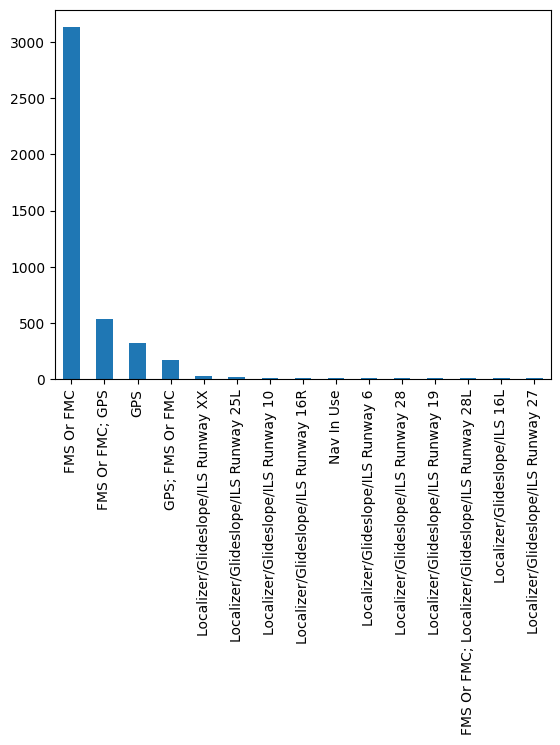

In [ ]:
print(df["Nav In Use"].iloc[:,0].unique())
df["Nav In Use"].iloc[:,0].value_counts()[:15].plot(kind="bar")

['Parked; Taxi' 'Parked' 'Parked; Taxi; Parked'
 'Taxi; Landing; Landing; Parked' 'Landing; Landing; Takeoff / Launch'
 'Takeoff / Launch' 'Taxi; Parked' 'Parked; Parked; Taxi'
 'Landing; Landing' 'Initial Approach; Landing; Landing; Other Pattern'
 'Initial Approach' 'Cruise; Cruise' 'Initial Approach; Landing; Landing'
 'Landing; Initial Approach' 'Takeoff / Launch; Taxi; Parked; Other Abort'
 'Climb' 'Parked; Takeoff / Launch' 'Initial Climb'
 'Initial Approach; Landing; Descent; Descent'
 'Initial Climb; Takeoff / Launch' 'Initial Climb; Climb'
 'Taxi; Parked; Parked' 'Parked; Taxi; Other Other'
 'Landing; Initial Approach; Landing'
 'Landing; Landing; Parked; Parked; Taxi' 'Parked; Landing; Landing; Taxi'
 'Landing; Landing; Parked; Taxi' nan 'Takeoff / Launch; Other Abort'
 'Parked; Parked; Takeoff / Launch; Taxi'
 'Climb; Parked; Takeoff / Launch' 'Descent; Descent'
 'Cruise; Cruise; Descent; Descent'
 'Takeoff / Launch; Parked; Climb; Taxi'
 'Cruise; Landing; Landing; Initial A

<Axes: >

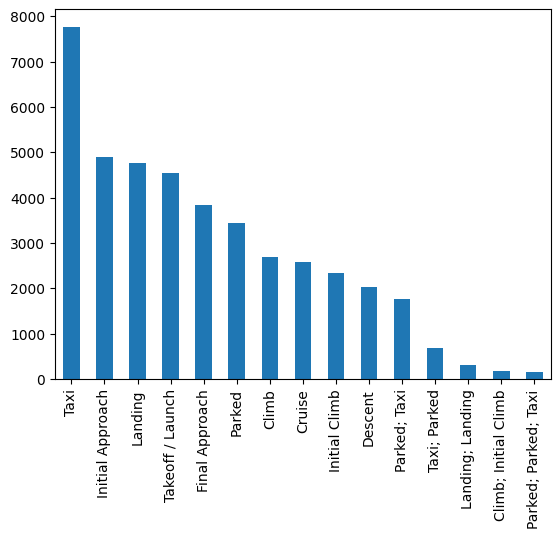

In [ ]:
print(df["Flight Phase"].iloc[:,0].unique())
df["Flight Phase"].iloc[:,0].value_counts()[:15].plot(kind="bar")

[nan 'Visual Approach' 'Other Straight In' ... 'SID HPN7' 'SID ZZZ 7'
 'Direct; Visual Approach; STAR ZZZZZ']


<Axes: >

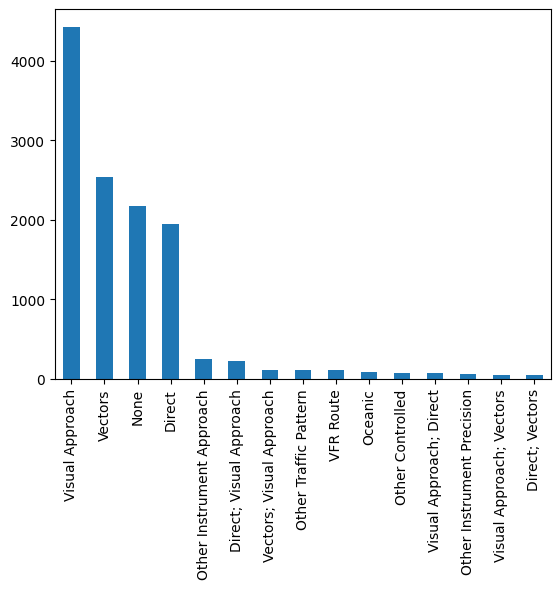

In [ ]:
print(df["Route In Use"].iloc[:,0].unique())
df["Route In Use"].iloc[:,0].value_counts()[:15].plot(kind="bar")

[nan 'Class D CVG; Class E CVG' 'Class G PYM' ... 'Class G GLE'
 'Class G ORS' 'Class G K81']


<Axes: >

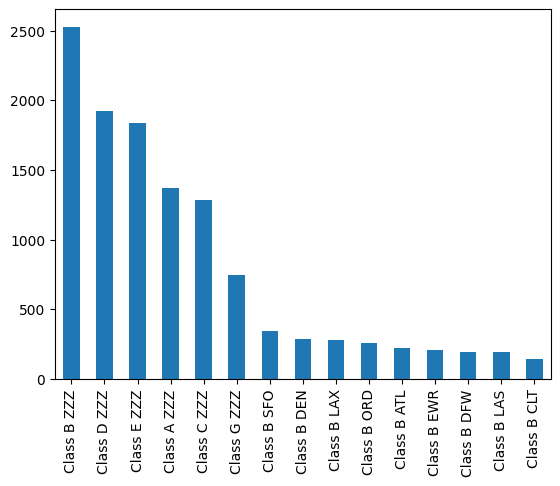

In [ ]:
print(df["Airspace"].iloc[:,0].unique())
df["Airspace"].iloc[:,0].value_counts()[:15].plot(kind="bar")

[nan 'Number Of Seats.Number' '8' '5' '6' '50' '12' '145' '19' '4' '139'
 '155' '7' '250' '126' '120' '130' '34' '46' '142' '140' '118' '149' '450'
 '340' '30' '190' '9' '13' '64' '45' '128' '107' '10' '133' '115' '100'
 '125' '298' '265' '172' '135' '146' '182' '66' '37' '150' '109' '375' '2'
 '141' '40' '162' '360' '138' '20' '290' '104' '169' '3' '312' '39' '201'
 '15' '134' '16' '216' '87' '129' '32' '157' '176' '238' '225' '160' '137'
 '148' '247' '293' '181' '99' '187' '0']


<Axes: >

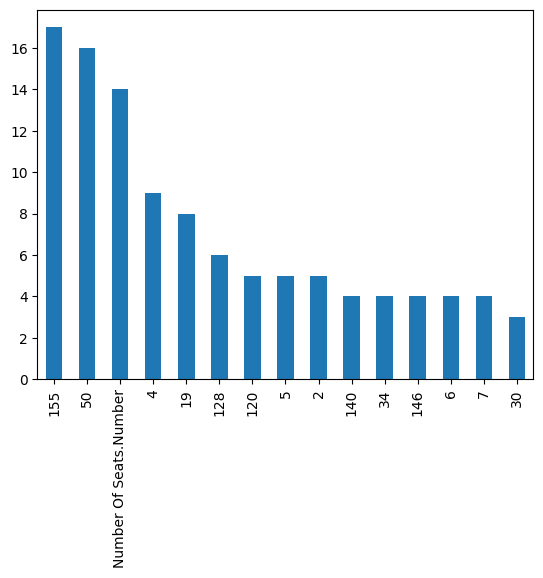

In [ ]:
print(df["Number Of Seats.Number"].iloc[:,0].unique())
df["Number Of Seats.Number"].iloc[:,0].value_counts()[:15].plot(kind="bar")

In [ ]:
print(df["Callback"].iloc[:,0].unique())

[nan 'Callback'
 'The reporter clarified the height and location of the cell phone tower in question. The tower is about 200 FT AGL or 3600 FT MSL and located just to the right of the LBB LOC 17R and a half mile outside the POLLO NDB.'
 'Reporter stated he was taxiing to Runway 34 and inadvertently turned onto the unlabeled taxiway prior to Taxiway C.  After reversing course and evaluating the situation; reporter stated there was a sign visible for aircraft taxiing westbound on Taxiway A labeling the restricted taxiway however not eastbound.  Reporter repeated his request for a label on taxiway diagrams stating the taxiway is restricted for use.'
 'Reporter stated the Cessna 150 had a Lycoming 4-cylinder engine that cracked at two locations on the engine crankcase; near the cylinder that was just replaced. But the cylinder change was not the cause of the cracks. The cause was a starter that had been installed incorrectly; years ago; causing wear on one of the crankshaft bearings.'
 "Re